## NREL WIND Toolkit - Kita Demo

This notebook demonstrates basic usage of the National Renewable Energy Laboratory (NREL) Wind Integration National Dataset (WIND) Toolkit data. More complete examples can be found here: https://github.com/NREL/hsds-examples. 


In [1]:
%matplotlib inline
import h5pyd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
h5pyd.version.version  # should be >= 0.4.2

'0.4.4'

In [3]:
! hsinfo

server name: Kita (HSDS) for KitaLab
server state: READY
endpoint: http://hsdshdflab.hdfgroup.org
username: jreadey@hdfgroup.org
password: ********************************
home: /home/jreadey/
server version: 0.5
node count: 8
up: 19 hours 3 min 40 sec
h5pyd version: 0.4.4


In [4]:
# In the shell, use the --bucket option to list files from NREL's S3 bucket 
! hsls --bucket nrel-pds-hsds /nrel/

nrel_admin                      folder   2017-08-20 21:46:58 /nrel/
nrel_admin                      folder   2019-10-01 14:08:23 /nrel/nsrdb
nrel_admin                      folder   2019-05-06 18:42:36 /nrel/nsrdb_h5
nrel_admin                      folder   2019-07-22 17:14:26 /nrel/nsrdb_test
nrel_admin                      domain   2017-08-20 22:06:29 /nrel/wtk-us.h5
nrel_admin                      folder   2019-10-01 14:07:38 /nrel/wtk
6 items


In [5]:
# Open the wind data "file". Use the bucket param to get data from NREL's S3 bucket
%time f = h5pyd.File("/nrel/wtk-us.h5", 'r', bucket="nrel-pds-hsds")  

CPU times: user 4 ms, sys: 8 ms, total: 12 ms
Wall time: 93.8 ms


In [6]:
%time f.attrs['history']   # attributes can be used to provide desriptions of the content

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 114 µs


'Produced by 3TIER, Inc. under NREL subcontract AGV-2-22460-01'

In [7]:
list(f)  # list the datasets in the file

['inversemoninobukhovlength_2m',
 'status',
 'windspeed_10m',
 'temperature_80m',
 'temperature_160m',
 'temperature_200m',
 'pressure_200m',
 'DIF',
 'temperature_10m',
 'winddirection_120m',
 'windspeed_120m',
 'windspeed_140m',
 'temperature_60m',
 'relativehumidity_2m',
 'windspeed_200m',
 'temperature_140m',
 'precipitationrate_0m',
 'winddirection_160m',
 'pressure_0m',
 'GHI',
 'windspeed_80m',
 'winddirection_100m',
 'temperature_2m',
 'temperature_40m',
 'coordinates',
 'winddirection_60m',
 'windspeed_160m',
 'winddirection_40m',
 'winddirection_10m',
 'DNI',
 'winddirection_200m',
 'windspeed_60m',
 'datetime',
 'pressure_100m',
 'windspeed_40m',
 'temperature_120m',
 'windspeed_100m',
 'winddirection_140m',
 'temperature_100m',
 'winddirection_80m']

In [8]:
# get the windspeed at 80 meters
dset = f['windspeed_80m']

In [9]:
dset.id.id  # if this is an int, then you are using h5py!

'd-d29fda32-85f3-11e7-bf89-0242ac110008'

In [10]:
dset.shape  # shape is three-dimensional  time x lat x lon

(61368, 1602, 2976)

In [11]:
dset.dtype  # type is four byte floats

dtype('float32')

In [12]:
dset.chunks  # chunks describe how the dataset data is stored

(24, 89, 186)

In [13]:
dset.shape[0] * dset.shape[1] * dset.shape[2] * 4  # ~1 TB per dataset

1170300524544

In [14]:
# read one slice of the data
%time data = dset[522,::,::]

CPU times: user 124 ms, sys: 100 ms, total: 224 ms
Wall time: 1.57 s


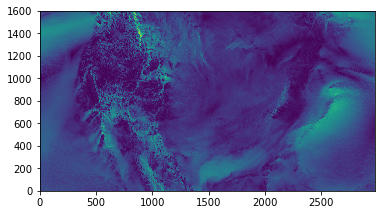

In [15]:
plt.imshow(data, origin="lower")

In [16]:
# Get all the values for a given geographic point
# this may take up to a minute
%time tseries = dset[:, 290, 201]

CPU times: user 16 ms, sys: 0 ns, total: 16 ms
Wall time: 8.86 s


In [17]:
len(tseries)   # 7 years * 365 days * 24 hours

61368

In [18]:
tseries.min(), tseries.max(), tseries.mean()

(0.036621094, 23.603012, 6.1045403)

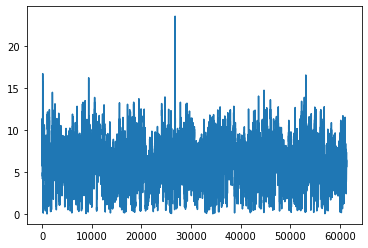

In [19]:
x = range(len(tseries))
plt.plot(x, tseries)

In [20]:
# get just one month of values
start = 25000 # anything between 0 and 61367 will work
end = start + 30*24
%time tseries = dset[start:end, 1292, 601]

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 660 ms


In [21]:
tseries.min(), tseries.max(), tseries.mean()

(0.22583771, 22.672203, 9.012713)

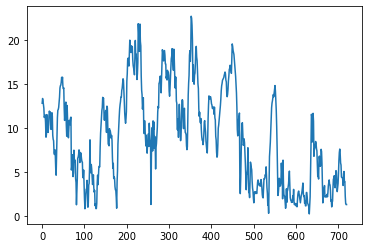

In [22]:
x = range(len(tseries))
plt.plot(x, tseries)